In [1]:
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('data/ratings_small.csv', usecols=['userId', 'movieId', 'rating', 'timestamp'])
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('data/ratings_small.csv', reader=reader)
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


#### Task 2.c

In [3]:
algos = {
    'PMF': SVD(biased=False),
    'UserCF': KNNBasic(sim_options={'name': 'MSD', 'user_based': True}),
    'ItemCF': KNNBasic(sim_options={'name': 'MSD', 'user_based': False})
}

for name, algo in algos.items():
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    avg_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
    avg_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])
    print(f'{name} - Mean RMSE: {avg_rmse:.2f}, Mean MAE: {avg_mae:.2f}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0077  1.0069  1.0150  0.9943  1.0133  1.0074  0.0072  
MAE (testset)     0.7792  0.7776  0.7838  0.7714  0.7773  0.7778  0.0040  
Fit time          0.92    0.99    0.97    0.98    0.96    0.97    0.03    
Test time         0.19    0.13    0.14    0.20    0.12    0.16    0.03    
PMF - Mean RMSE: 1.01, Mean MAE: 0.78
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9642  0.9694  

#### Task 2.d

In [4]:
algos = {
    'PMF': SVD(biased=False),
    'UserCF': KNNBasic(sim_options={'user_based': True}),
    'ItemCF': KNNBasic(sim_options={'user_based': False})
}

for name, algo in algos.items():
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    avg_mae = sum(results['test_mae']) / len(results['test_mae'])
    avg_rmse = sum(results['test_rmse']) / len(results['test_rmse'])
    print(f"{name} - Mean RMSE: {avg_rmse:.2f}, Mean MAE: {avg_mae:.2f}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0119  1.0118  1.0080  1.0056  1.0105  1.0096  0.0024  
MAE (testset)     0.7822  0.7849  0.7748  0.7746  0.7768  0.7786  0.0041  
Fit time          0.92    0.92    1.00    0.95    0.95    0.95    0.03    
Test time         0.12    0.12    0.18    0.13    0.12    0.14    0.02    
PMF - Mean RMSE: 1.01, Mean MAE: 0.78
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9674  0.9696  

#### Task 2.e

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0002  0.9940  0.9988  0.9883  0.9912  0.9945  0.0045  
MAE (testset)     0.7748  0.7680  0.7703  0.7623  0.7660  0.7683  0.0042  
Fit time          0.15    0.21    0.17    0.17    0.17    0.17    0.02    
Test time         1.52    1.45    1.36    1.38    1.39    1.42    0.06    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

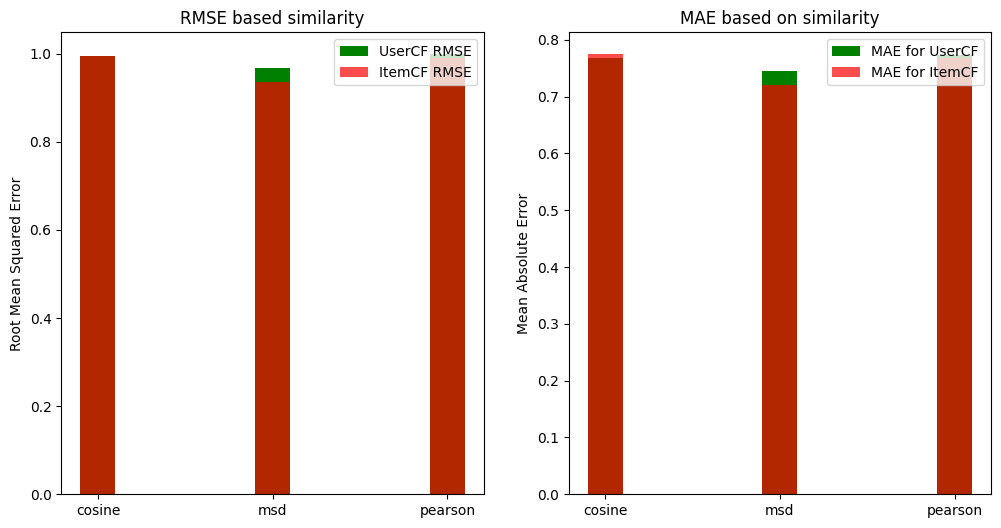

In [7]:
similarity_options = ['cosine', 'msd', 'pearson']
results = {'UserCF': {'RMSE': [], 'MAE': []}, 'ItemCF': {'RMSE': [], 'MAE': []}}

for sim_option in similarity_options:
    for algo_type in ['UserCF', 'ItemCF']:
        algo = KNNBasic(sim_options={'name': sim_option, 'user_based': algo_type == 'UserCF'})
        cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
        avg_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
        avg_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])
        results[algo_type]['RMSE'].append(avg_rmse)
        results[algo_type]['MAE'].append(avg_mae)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.bar(similarity_options, results['UserCF']['RMSE'], width=0.2, label='UserCF RMSE', color = 'green')
ax1.bar(similarity_options, results['ItemCF']['RMSE'], width=0.2, label='ItemCF RMSE', color = 'red', alpha=0.7)
ax1.set_title('RMSE based similarity')
ax1.set_ylabel('Root Mean Squared Error')
ax1.legend()

ax2.bar(similarity_options, results['UserCF']['MAE'], width=0.2, label='MAE for UserCF', color = 'green')
ax2.bar(similarity_options, results['ItemCF']['MAE'], width=0.2, label='MAE for ItemCF', color = 'red', alpha=0.7)
ax2.set_title('MAE based on similarity')
ax2.set_ylabel('Mean Absolute Error')
ax2.legend()

plt.show()

#### 2.f

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9747  0.9914  0.9835  0.9837  0.9979  0.9862  0.0078  
MAE (testset)     0.7482  0.7584  0.7534  0.7548  0.7592  0.7548  0.0039  
Fit time          0.11    0.14    0.14    0.14    0.13    0.13    0.01    
Test time         1.05    1.20    1.20    1.36    1.04    1.17    0.12    
UserCF - Neighbors: 5, RMSE: 0.9862226311487221, MAE: 0.7547910776945358
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

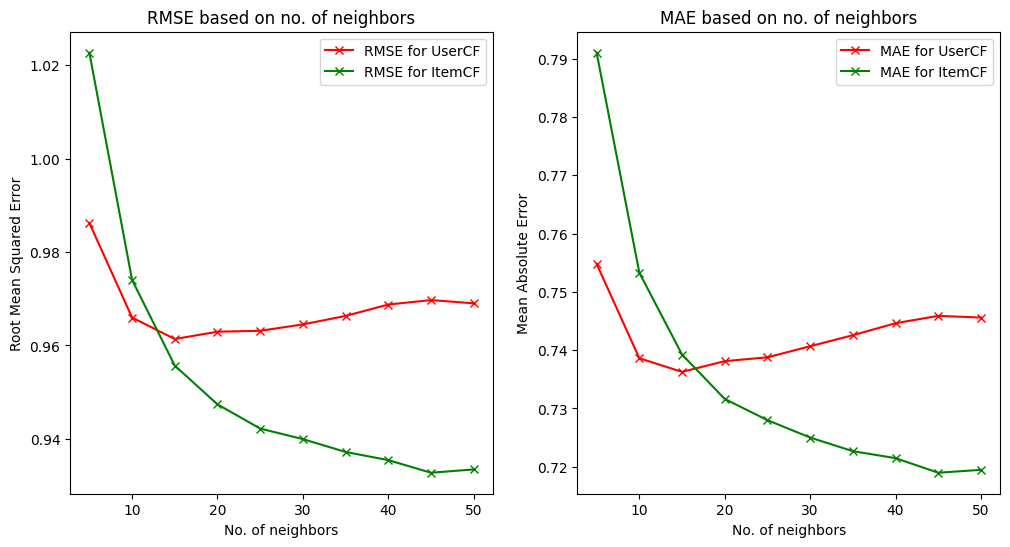

In [8]:
neighbor_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
results = {'UserCF': {'RMSE': [], 'MAE': []}, 'ItemCF': {'RMSE': [], 'MAE': []}}
for k in neighbor_range:
    for algo_type in ['UserCF', 'ItemCF']:
        algo = KNNBasic(k=k, sim_options={'user_based': algo_type == 'UserCF'})
        cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
        avg_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
        avg_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])
        results[algo_type]['RMSE'].append(avg_rmse)
        results[algo_type]['MAE'].append(avg_mae)
        print(f"{algo_type} - Neighbors: {k}, RMSE: {avg_rmse}, MAE: {avg_mae}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(neighbor_range, results['UserCF']['RMSE'], marker='x', label='RMSE for UserCF', color='red')
ax1.plot(neighbor_range, results['ItemCF']['RMSE'], marker='x', label='RMSE for ItemCF', color='green')
ax1.set_title('RMSE based on no. of neighbors')
ax1.set_xlabel('No. of neighbors')
ax1.set_ylabel('Root Mean Squared Error')
ax1.legend()
ax2.plot(neighbor_range, results['UserCF']['MAE'], marker='x', label='MAE for UserCF', color='red')
ax2.plot(neighbor_range, results['ItemCF']['MAE'], marker='x', label='MAE for ItemCF', color='green')
ax2.set_title('MAE based on no. of neighbors')
ax2.set_xlabel('No. of neighbors')
ax2.set_ylabel('Mean Absolute Error')
ax2.legend()
plt.show()